In [1]:
from matplotlib import pyplot as plt
import numpy as np
import sklearn
import cv2
import math
from random import randint

In [2]:
img1 = cv2.imread("cereal.jpg")
img2 = cv2.imread("cereal_l.jpg")
img3 = cv2.imread("cereal_r.jpg")
img4 = cv2.imread("cereal_tr.jpg")
img5 = cv2.imread("cereal_tl.jpg")

In [3]:
def DetectAndCompute(img):
    my_SIFT_instance = cv2.SIFT_create()
#     img_grey = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    kps, des = my_SIFT_instance.detectAndCompute(img, None)
    matchimg = cv2.drawKeypoints(img, kps, None) #draw key points circle

    return matchimg,des,kps

In [4]:
def MatchDrawUpdate(des1, des2, kps1, kps2, img1, img2):
    matches = cv2.FlannBasedMatcher().knnMatch(des1, des2, k=2)
    good = []
    dis = []
    for m, n in matches:
        if m.distance < 0.75 * n.distance:
            good.append([m])
            dis.append(m.distance)
    img = np.zeros((img1.shape[0],img1.shape[1]), dtype=np.uint8)
    img_matching = cv2.drawMatchesKnn(img1, kps1, img2, kps2, good, None) #result image after matching keypoints
    img_out = cv2.drawKeypoints(img_matching, kps1, None)
#     img_out2 = cv2.drawKeypoints(img_matching, kps2, None)
    return img_out, good

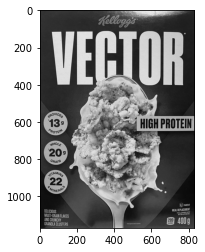

In [5]:
img1_gray = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(img1_gray,cv2.COLOR_BGR2RGB))

In [6]:
def CreateTarget(img):
    imgCenter = (img.shape[1]/2, img.shape[0]/2)
    rotationVal = randint(10,360)
    scaleVal = randint(0, 1)
    M = cv2.getRotationMatrix2D(imgCenter, 10, 0.5)
    img_out = cv2.warpAffine(img, M, (img.shape[1], img.shape[0]), None)
    return img_out

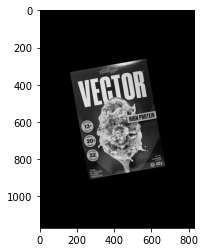

In [7]:
TargetImg = CreateTarget(img1_gray)
plt.imshow(cv2.cvtColor(TargetImg,cv2.COLOR_BGR2RGB))

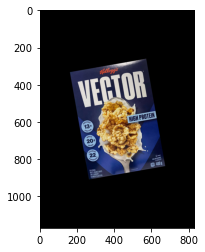

In [8]:
matching1, des1, kps1 = DetectAndCompute(img1_gray)
matching2, des2, kps2 = DetectAndCompute(TargetImg)
imgRes, lowe_matches = MatchDrawUpdate(des1, des2, kps1, kps2, img1_gray, TargetImg)
ref_pts = np.float32([kps1[m[0].queryIdx].pt for m in lowe_matches]).reshape(-1, 1, 2)
img_pts = np.float32([kps2[m[0].trainIdx].pt for m in lowe_matches]).reshape(-1, 1, 2)
TM, mask = cv2.estimateAffinePartial2D(ref_pts, img_pts)
img1_copy = img1.copy()
NewTargetImg = cv2.warpAffine(img1_copy, TM, (img1.shape[1], img1.shape[0]), None)
plt.imshow(cv2.cvtColor(NewTargetImg,cv2.COLOR_BGR2RGB))

In [9]:
def PerspectiveTransform(img1, img2, img3):
#     TargetImg = CreateTarget(img1)
    matching1, des1, kps1 = DetectAndCompute(img1)
    matching2, des2, kps2 = DetectAndCompute(img2)
    imgRes, lowe_matches = MatchDrawUpdate(des1, des2, kps1, kps2, img1, img2)
    ref_pts = np.float32([kps1[m.queryIdx].pt for m in lowe_matches]).reshape(-1, 1, 2)
    img_pts = np.float32([kps2[m.trainIdx].pt for m in lowe_matches]).reshape(-1, 1, 2)
    TM, mask = cv2.findHomography(ref_pts, img_pts, cv2.RANSAC, 5.0)
    img3_copy = img3.copy()
    NewTargetImg = cv2.warpPerspective(img3_copy, TM, (img3.shape[1], img3.shape[0]), None)
#     plt.imshow(cv2.cvtColor(NewTargetImg,cv2.COLOR_BGR2RGB))
   
    fig = plt.figure(figsize=(10, 7)) #create figure framework
    rows = 2
    columns = 3
#     plt.imshow(cv2.cvtColor(img1,cv2.COLOR_BGR2RGB))
    
    fig.add_subplot(rows, columns, 1)
    plt.imshow(cv2.cvtColor(img1,cv2.COLOR_BGR2RGB))
    
    fig.add_subplot(rows, columns, 2)
    plt.imshow(cv2.cvtColor(img2,cv2.COLOR_BGR2RGB))
    
    fig.add_subplot(rows, columns, 3)
    plt.imshow(cv2.cvtColor(NewTargetImg,cv2.COLOR_BGR2RGB))
    

In [10]:
img1_gray = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
img2_gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
img3_gray = cv2.cvtColor(img3,cv2.COLOR_BGR2GRAY)
img4_gray = cv2.cvtColor(img4,cv2.COLOR_BGR2GRAY)
img5_gray = cv2.cvtColor(img5,cv2.COLOR_BGR2GRAY)

In [11]:
PerspectiveTransform(img1_gray, img2_gray, img1)

AttributeError: 'list' object has no attribute 'queryIdx'

In [ ]:
PerspectiveTransform(img1_gray, img3_gray, img1)

In [ ]:
PerspectiveTransform(img1_gray, img4_gray, img1)

In [ ]:
PerspectiveTransform(img1_gray, img5_gray, img1)